In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

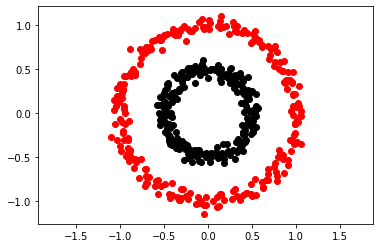

(500, 1)

In [ ]:
# crear dataset
n=500
p=2

X,Y=make_circles(n_samples=n,factor=0.5,noise=0.05)
#print(X,Y)
plt.scatter(X[Y==0,0],X[Y==0,1], c="red")
plt.scatter(X[Y==1,0],X[Y==1,1], c='black')
plt.axis('equal')
plt.show()
Y=Y[:,np.newaxis]
Y.shape

In [ ]:
#Clase de la capa de la red
class neural_layer():
  def __init__(self,conecciones,neuronas,funcion_activacion):
    self.funcion_activacion=funcion_activacion
    self.b=np.random.rand(1,neuronas)*2-1
    self.w=np.random.rand(conecciones,neuronas)*2-1

0.9933071490757153


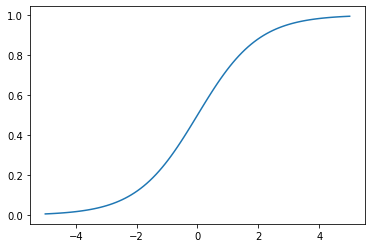

In [ ]:
#Funciones de activación:
sigmoide=(lambda x: 1/(1+np.e**(-x)),
          lambda x: x*(1-x))
relu =lambda x:np.maximum(0,x)
m=np.linspace(-5,5,100)
n=sigmoide[0](m)
t=5
print(sigmoide[0](t))
plt.plot(m,n)

In [ ]:
#capa 0
l0=neural_layer(p,4,sigmoide)
l1=neural_layer(4,8,sigmoide)
#...

#ciclo para crear capas con el nuero e neuronas en topology, capas ocultas
def create_nn(topology,funcion_activacion):
  nn=[]
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],funcion_activacion))
  return nn


In [ ]:
topology=[p,4,8,1]
red_neuronal=create_nn(topology,sigmoide)


#funcion de coste y su derivada:
coste=(lambda Yp,Yr: np.mean((Yp-Yr)**2),
       lambda Yp,Yr: (Yp,Yr))


#X,Y datos de entrada y de salida, lr -learnig rate
def train(red_neuronal,X,Y,coste,lr=0.5,train=True):
  #guarda pares de infomacin que se guarde el valor de la suma ponderada y valos de activaciń
  out=[(None,X)]
  #Forward pass:
  #suma ponderarda
  for l,layer in enumerate(red_neuronal):
    #suma ponderada de cada capa
    z = out[-1][1]@ red_neuronal[l].w+red_neuronal[l].b

    #activación
    a=red_neuronal[l].funcion_activacion[0](z)
    out.append((z,a))

  if train:
    #Backward pass
    deltas=[]
    for l in reversed(range(0,len(red_neuronal))):

      z=out[l+1][0]
      a=out[l+1][1]

      if l==len(red_neuronal)-1:
        deltas.insert(0,coste[1](a,Y)*red_neuronal[l].funcion_activacion[1](a))
        #Calcular delta de la ultima capa
      else:
        #calcular delta respecto a capa previa
        deltas.insert(0,deltas[0] @ _w.T*red_neuronal[l].funcion_activacion[1](a))
      _w=red_neuronal[l].w

      #Gradient descent
      red_neuronal[l].b=red_neuronal[l].b-np.mean(deltas[0],axis=0,keepdims=True)*lr
      red_neuronal[l].w=red_neuronal[l].w-out[l][1].T @ deltas[0]*lr

  return out[-1][1]
train(red_neuronal,X,Y,coste,0.5)
print('')


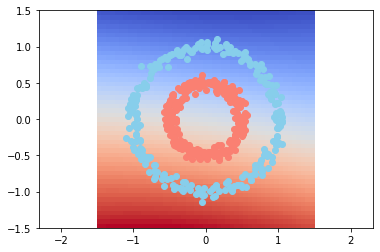

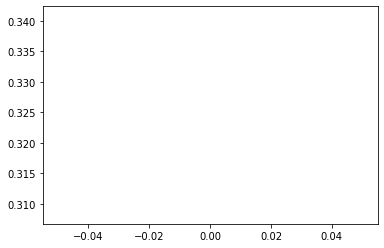

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: ignored

In [ ]:
import time 
from IPython.display import clear_output

neural_n=create_nn(topology,sigmoide)


loss=[]

for i in range(1000):
  #entrenamos a la red
  pY=train(neural_n,X,Y,coste,lr=0.001)


  if i%25==0:
    loss.append(coste[0](pY,Y))

    res=50
    _x0=np.linspace(-1.5,1.5,res)
    _x1=np.linspace(-1.5,1.5,res)

    _Y=np.zeros((res,res))

    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[i0,i1]=train(neural_n,np.array([[x0,x1]]),Y,coste,train=False)[0][0]
    plt.pcolormesh(_x0,_x1,_Y,cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='skyblue')
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)
